In [2]:
!pip install keras-tuner
!pip install zipp
!pip install tensorflow_hub

In [5]:
import tensorflow as tf
from tensorflow import keras # wrapper for tensorflow / pytorch  
from tensorflow.keras import layers, Sequential
import PIL.Image as Image  #image library : help to display image 
import cv2 #can convert image into numpy / resize
import pathlib # can perform path related operations
import os
import numpy as np
import matplotlib.pyplot as plt
import random as rd

ModuleNotFoundError: No module named 'cv2'

In [4]:
# setting up api token for kaggle
from google.colab import files

uploaded = files.upload()

for file_name in uploaded.keys():
  print(f"File - {file_name} : {len(uploaded[file_name])} Bytes")

# then move kaggle.json into the folder where API expects to find it
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
File - kaggle.json : 67 Bytes


In [5]:
# download dataset from kaggle
!kaggle datasets download -d abbasseifossadat/dental-radiography-segmentation

Dataset URL: https://www.kaggle.com/datasets/abbasseifossadat/dental-radiography-segmentation
License(s): CC-BY-SA-4.0
dental-radiography-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# extract zip
from zipp import zipfile as zp
file_name = "/content/dental-radiography-segmentation.zip"
with zp.ZipFile(file_name, 'r') as zip:
  zip.extractall('/content/sample_data/')

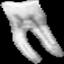

In [18]:
# visualizing images using PIL
img_path = ["/content/sample_data/Dental_Radiography/train/Fillings/0001_jpg.rf.57229a11e925669019e179341e22c97a_segment_5715.png",
            "/content/sample_data/Dental_Radiography/train/Cavity/0012_jpg.rf.72a1e0ed221d11e2ce6867b15281591c_segment_2949.png",
            "/content/sample_data/Dental_Radiography/train/Normal/0001_jpg.rf.30a42966fb9c51553f6949b70234218d_segment_41.png",
            "/content/sample_data/Dental_Radiography/train/Impacted Tooth/0024_jpg.rf.2f510cfa6ddbba4d18f7c0241af02748_segment_4443.png",
            "/content/sample_data/Dental_Radiography/test/Fillings/0095_jpg.rf.d7773e0afb13f54a3e6244079b483ab2_segment_447.png",
            "/content/sample_data/Dental_Radiography/test/Cavity/0905_jpg.rf.93c5b0e9d232f394f6cedf1c8f3879f4_segment_198.png",]

idx = rd.randint(0,len(img_path))
sample_image = Image.open(img_path[idx])
sample_image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 55,  55,  55],
        [139, 139, 139],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
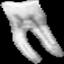

In [19]:
np.array(sample_image).astype('uint8')

#### Loading Dataset Dataset

In [34]:
# get all available categories / subfolders
labels = []
for path in data_dir.iterdir():
  labels.append(path.name)

# fixing the Imagesize
IMAGE_SIZE = (80,80)

def get_dataset(name='train'):
  # create dataset path
  path_name = f"/content/sample_data/Dental_Radiography/{name}"
  data_dir = pathlib.Path(path_name)
  print("data directory:",data_dir)


  # get how many samples are in this dataset
  total_samples = len(list(data_dir.glob('*/*')))
  print("no. of sample:",total_samples)

  # creating X and y
  X, y = np.zeros((total_samples,*IMAGE_SIZE,3), dtype='int32'), np.zeros((total_samples,), dtype='int32')
  pos = 0
  for i, label in enumerate(labels):
    for image in data_dir.glob(f'{label}/*'):
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img, IMAGE_SIZE)
      X[pos] = resized_img
      y[pos] = i
      pos += 1

  print(f"X_{name}'s Shape : {X.shape}\ny_{name}'s Shape : {y.shape}")
  return X,y

In [21]:
x_train, y_train = get_dataset()

data directory: /content/sample_data/Dental_Radiography/train
no. of sample: 25136
X_train's Shape : (25136, 80, 80, 3)
y_train's Shape : (25136,)


array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[15, 15, 15],
        [15, 15, 15],
        [19, 19, 19],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=int32)

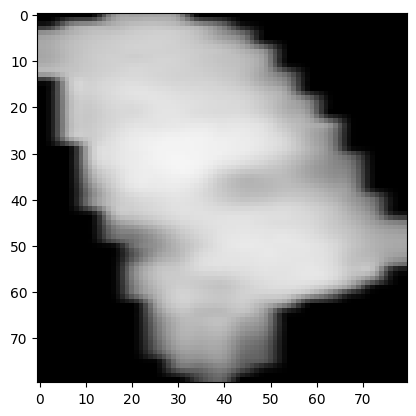

In [22]:
plt.imshow(x_train[10])
x_train[10]

In [23]:
# building CNN

model = Sequential([
    layers.Rescaling(1./255, input_shape=IMAGE_SIZE+(3,)),
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=len(labels), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 190s 242ms/step - accuracy: 0.7495 - loss: 0.6524
Epoch 2/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 200s 239ms/step - accuracy: 0.8073 - loss: 0.5088
Epoch 3/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 200s 236ms/step - accuracy: 0.8266 - loss: 0.4525
Epoch 4/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 199s 233ms/step - accuracy: 0.8598 - loss: 0.3807
Epoch 5/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 203s 234ms/step - accuracy: 0.8826 - loss: 0.3142
Epoch 6/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 186s 237ms/step - accuracy: 0.9078 - loss: 0.2549
Epoch 7/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 185s 236ms/step - accuracy: 0.9225 - loss: 0.2133
Epoch 8/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 204s 238ms/step - accuracy: 0.9334 - loss: 0.1870
Epoch 9/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 188s 239ms/step - accuracy: 0.9473 - loss: 0.1422
Epoch 10/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 187s 238ms/step - accuracy: 0.9625 - loss: 0.1109


In [26]:
model.evaluate(x_train,y_train)

786/786 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.9417 - loss: 0.1466


[0.16954278945922852, 0.9338001012802124]

In [27]:
import joblib

joblib.dump(model, '/content/tooth_disease.h5')

['/content/tooth_disease.h5']

In [28]:
x_validation, y_validation = get_dataset('valid')

data directory: /content/sample_data/Dental_Radiography/valid
no. of sample: 2812
X_valid's Shape : (2812, 80, 80, 3)
y_valid's Shape : (2812,)


In [29]:
model.evaluate(x_validation, y_validation)

88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.8537 - loss: 0.7282


[0.6076860427856445, 0.8549075126647949]

In [39]:
def prediction(x,y,idx):
  y_pred = model.predict(x[np.newaxis, idx])
  category = np.argmax(y_pred)
  print(f"Predicted: {category} | Acctual: {y[idx]}")
  print(f"Predicted: {labels[category]} | Acctual: {labels[y[idx]]}")

In [40]:
prediction(x_validation, y_validation, 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted: 2 | Acctual: 0
Predicted: Normal | Acctual: Cavity


In [41]:
prediction(x_validation, y_validation, 40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted: 2 | Acctual: 0
Predicted: Normal | Acctual: Cavity


In [42]:
prediction(x_validation, y_validation, 100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: 2 | Acctual: 2
Predicted: Normal | Acctual: Normal


In [43]:
prediction(x_validation, y_validation, 500)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted: 2 | Acctual: 2
Predicted: Normal | Acctual: Normal


In [44]:
prediction(x_validation, y_validation, 1542)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: 0 | Acctual: 2
Predicted: Cavity | Acctual: Normal


In [45]:
y_pred = model.predict(x_validation)
y_pred = [np.argmax(i) for i in y_pred]

88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step


In [46]:
cm = tf.math.confusion_matrix(y_validation, y_pred)

<Axes: >

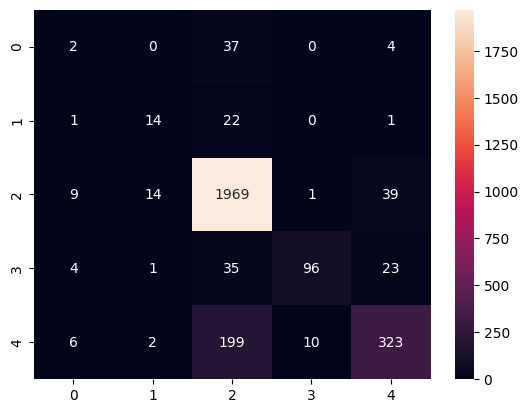

In [48]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')